In [1]:
# noinspection PyUnresolvedReferences
# noinspection PyUnresolvedReferences
# from ipynb.fs.full.preparation import expanded_df, expanded_df2

Datasets: 8. Strategies: 3. Single dataset Formulae:3073
Datasets: 8. Strategies: 3. Single dataset Formulae:4221
Datasets: 8. Strategies: 3. Single dataset Formulae:5111
Datasets: 8. Strategies: 3. Single dataset Formulae:5072


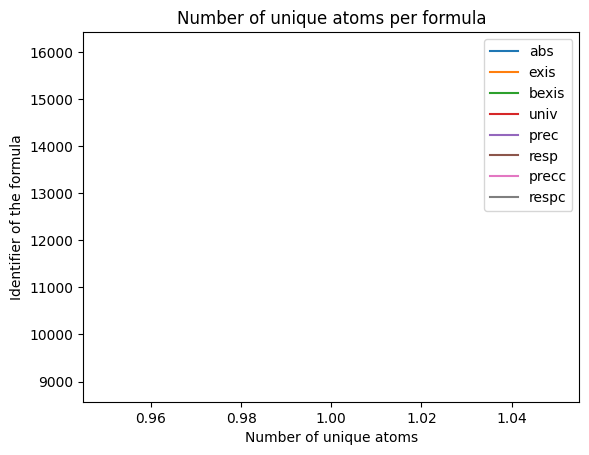

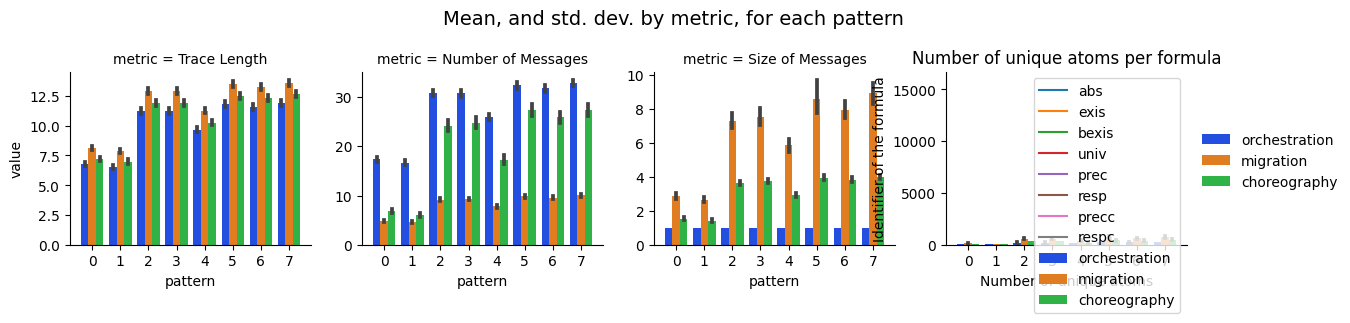

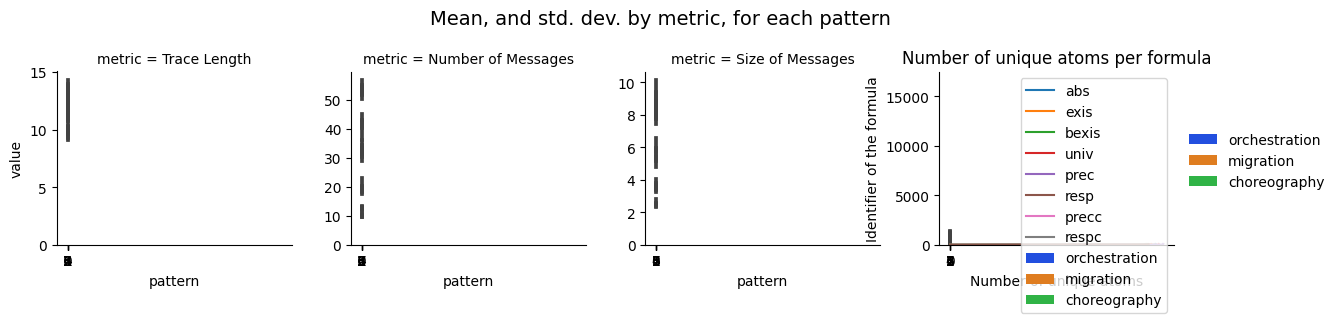

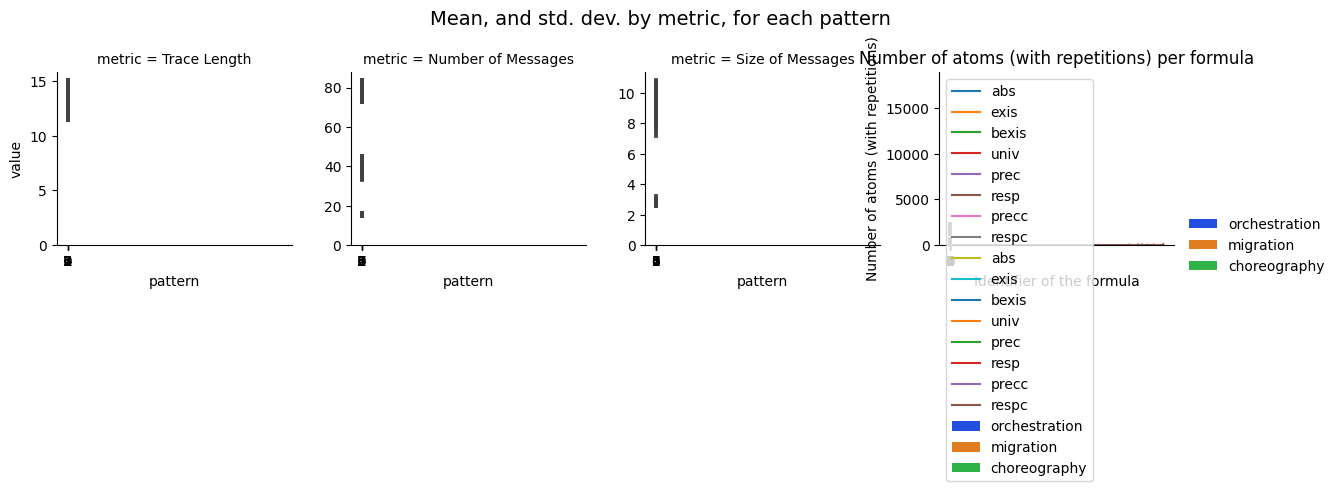

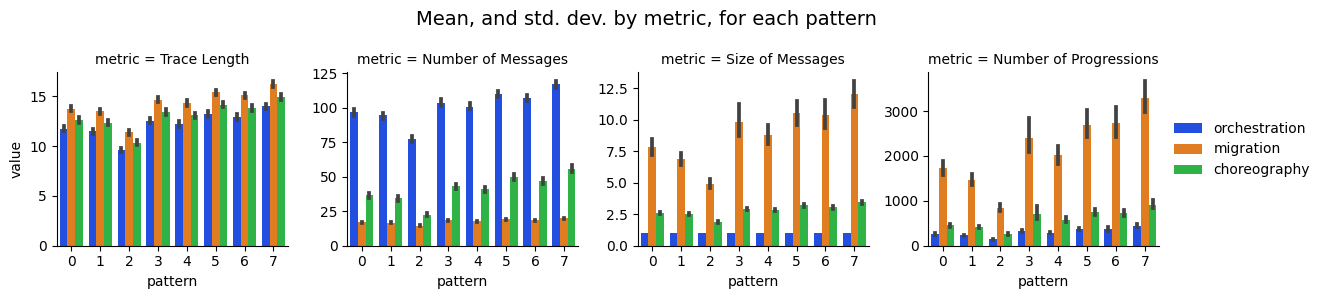

In [2]:
# noinspection PyUnresolvedReferences
from ipynb.fs.full.full_data_3 import full_scale_df_3
from ipynb.fs.full.full_data_5 import full_scale_df_5
from ipynb.fs.full.full_data_7 import full_scale_df_7
from ipynb.fs.full.full_data_9 import full_scale_df_9

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression

from decmon.learning import *

## Classification

We drop columns that are not numeric (and in our case, present in the dataset in other forms)

In [4]:
cols_to_drop = ['formula', 'strategy', 'trace']

In [5]:
TARGET = 'strategy_id'
N_CLASSES = 3 # orchestration, migration, choreography

In [6]:
# print(full_scale_df.groupby(['formula']).max())
# indexed = full_scale_df.set_index(['formula'], append=True).swaplevel(0, 1).sort_values(['formula', 'nb_progressions'], ascending=True)
# indexed.head()
# indexed['strategy_id']

In [7]:
# test = indexed.query('nb_progressions == nb_progressions.max()')
# test
# idx = indexed.groupby(level=0)['nb_progressions'].mean()
# indexed[indexed.index.isin(idx)]
# full_scale_df2 = full_scale_df.sort_values(['nb_progressions'], ascending=True).groupby(['formula']).agg(f)
# full_scale_df2.reset_index(inplace=True, drop=True)

In [8]:
# final_df = clean_df(full_scale_df2, cols_to_drop)
# final_df['strategy_id'].value_counts()

In [9]:
# X_train, X_test, y_train, y_test = prepare_learning_sets(final_df, TARGET)

In [10]:
import mgzip
import pickle

# filename = 'finalized_classifier.mgzip.sav'
filename = 'finalized_classifier.sav'
def store_model(name: str, model: any, zip=False):
    if zip:
        with mgzip.open(name, 'wb') as f:
            pickle.dump(model, f)
    else:
        with open(name,'wb') as f:
            pickle.dump(model, f)

In [11]:
import time
def chrono(label: str, start: float=time.time()):
    current = time.time()
    print(f"--- {label}: %s seconds ---" % (current - start))
    return current

In [12]:
import numpy as np

def classify_by_metric(original_df: DataFrame, metric: str, technique: any):
    f = dict.fromkeys(original_df, 'first')
    f.update({
        'x':'mean',
        'trace_len':'mean', 
        'num_mess':'mean', 
        'size_mess':'mean', 
        'nb_progressions':'mean',
        })
    
    print(f"Metric: {metric}")
    newdf = original_df.sort_values([metric], ascending=True).groupby(['formula']).agg(f)
    newdf.reset_index(inplace=True, drop=True)
    fdf = clean_df(newdf, cols_to_drop)
    print(f"Value counts:\n{fdf['strategy_id'].value_counts()}")
    X_train, X_test, y_train, y_test = prepare_learning_sets(fdf, TARGET)
    print(f"Training Dataset size: {X_train.size}")
    print(f"Testing Dataset size: {X_test.size}")
    timer = chrono("Training start")
    classifier = technique.fit(X_train, y_train)
    chrono("Training end", timer)
    mean_accuracy = classifier.score(X_test, y_test)
    print(f"Accuracy: {mean_accuracy}")
    timer = chrono("Testing start")
    pred_y = classifier.predict(X_test)
    chrono("Testing end", timer)
    f1 = f1_score(pred_y, y_test, labels=[0, 1, 2], average=None)
    print(f"F1: {f1}")
    print(f"------------------------")
    return classifier


### System dim. 3

In [13]:
c = classify_by_metric(full_scale_df_3, 'nb_progressions', KNeighborsClassifier(n_neighbors=N_CLASSES))

Metric: nb_progressions
Value counts:
strategy_id
2    14102
0      557
1       12
Name: count, dtype: int64
Training Dataset size: 7280721
Testing Dataset size: 3121018
--- Training start: 1.0924708843231201 seconds ---
--- Training end: 0.0021491050720214844 seconds ---
Accuracy: 0.9563834620626988
--- Testing start: 1.6675128936767578 seconds ---
--- Testing end: 0.26158595085144043 seconds ---
F1: [0.15859031 0.         0.97761194]
------------------------


In [14]:
store_model("finalized_classifier.sav", c) # 30MB

In [15]:
classify_by_metric(full_scale_df_3, 'nb_progressions', KNeighborsClassifier(n_neighbors=N_CLASSES))
classify_by_metric(full_scale_df_3, 'num_mess', KNeighborsClassifier(n_neighbors=N_CLASSES))
classify_by_metric(full_scale_df_3, 'size_mess', KNeighborsClassifier(n_neighbors=N_CLASSES))
classify_by_metric(full_scale_df_3, 'trace_len', KNeighborsClassifier(n_neighbors=N_CLASSES))

Metric: nb_progressions
Value counts:
strategy_id
2    14102
0      557
1       12
Name: count, dtype: int64
Training Dataset size: 7280721
Testing Dataset size: 3121018
--- Training start: 2.852036952972412 seconds ---
--- Training end: 0.0020041465759277344 seconds ---
Accuracy: 0.9563834620626988
--- Testing start: 3.115391969680786 seconds ---
--- Testing end: 0.26395511627197266 seconds ---
F1: [0.15859031 0.         0.97761194]
------------------------
Metric: num_mess
Value counts:
strategy_id
1    12228
0     2417
2       26
Name: count, dtype: int64
Training Dataset size: 7280721
Testing Dataset size: 3121018
--- Training start: 4.113810062408447 seconds ---
--- Training end: 0.0020208358764648438 seconds ---
Accuracy: 0.8714220808723308
--- Testing start: 4.384865999221802 seconds ---
--- Testing end: 0.25144290924072266 seconds ---
F1: [0.56835637 0.92475987 0.        ]
------------------------
Metric: size_mess
Value counts:
strategy_id
2    13246
0     1273
1      152
Name

/Users/enniovisco/Library/Caches/pypoetry/virtualenvs/distributed-monitor-QvRced_x-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNeighborsClassifier(n_neighbors=3)

### System dim. 5

In [16]:
classify_by_metric(full_scale_df_5, 'nb_progressions', KNeighborsClassifier(n_neighbors=N_CLASSES))
classify_by_metric(full_scale_df_5, 'num_mess', KNeighborsClassifier(n_neighbors=N_CLASSES))
classify_by_metric(full_scale_df_5, 'size_mess', KNeighborsClassifier(n_neighbors=N_CLASSES))
classify_by_metric(full_scale_df_5, 'trace_len', KNeighborsClassifier(n_neighbors=N_CLASSES))

Metric: nb_progressions
Value counts:
strategy_id
2    18621
0      403
1        2
Name: count, dtype: int64
Training Dataset size: 9975182
Testing Dataset size: 4275292
--- Training start: 8.516132116317749 seconds ---
--- Training end: 0.005263090133666992 seconds ---
Accuracy: 0.9765241765942537
--- Testing start: 9.012655973434448 seconds ---
--- Testing end: 0.5066080093383789 seconds ---
F1: [0.05633803 0.         0.98811425]
------------------------
Metric: num_mess


/Users/enniovisco/Library/Caches/pypoetry/virtualenvs/distributed-monitor-QvRced_x-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Value counts:
strategy_id
1    15501
0     3525
Name: count, dtype: int64
Training Dataset size: 9975182
Testing Dataset size: 4275292
--- Training start: 10.503695011138916 seconds ---
--- Training end: 0.004099130630493164 seconds ---
Accuracy: 0.8794674141555712
--- Testing start: 10.99902606010437 seconds ---
--- Testing end: 0.466904878616333 seconds ---
F1: [0.64278297 0.92750263 0.        ]
------------------------
Metric: size_mess


/Users/enniovisco/Library/Caches/pypoetry/virtualenvs/distributed-monitor-QvRced_x-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Value counts:
strategy_id
2    17346
0     1429
1      251
Name: count, dtype: int64
Training Dataset size: 9975182
Testing Dataset size: 4275292
--- Training start: 12.543065071105957 seconds ---
--- Training end: 0.005014896392822266 seconds ---
Accuracy: 0.9549754730203224
--- Testing start: 13.063055038452148 seconds ---
--- Testing end: 0.6611588001251221 seconds ---
F1: [0.7606383  0.45454545 0.97621313]
------------------------
Metric: trace_len
Value counts:
strategy_id
2    17283
0     1741
1        2
Name: count, dtype: int64
Training Dataset size: 9975182
Testing Dataset size: 4275292
--- Training start: 14.804357051849365 seconds ---
--- Training end: 0.005006074905395508 seconds ---
Accuracy: 0.8952347582340575
--- Testing start: 15.397402048110962 seconds ---
--- Testing end: 0.6574268341064453 seconds ---
F1: [0.15536723 0.         0.9441539 ]
------------------------


/Users/enniovisco/Library/Caches/pypoetry/virtualenvs/distributed-monitor-QvRced_x-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNeighborsClassifier(n_neighbors=3)

In [17]:
classify_by_metric(full_scale_df_7, 'nb_progressions', KNeighborsClassifier(n_neighbors=N_CLASSES))
classify_by_metric(full_scale_df_7, 'num_mess', KNeighborsClassifier(n_neighbors=N_CLASSES))
classify_by_metric(full_scale_df_7, 'size_mess', KNeighborsClassifier(n_neighbors=N_CLASSES))
classify_by_metric(full_scale_df_7, 'trace_len', KNeighborsClassifier(n_neighbors=N_CLASSES))

Metric: nb_progressions
Value counts:
strategy_id
2    23683
0      404
Name: count, dtype: int64
Training Dataset size: 11077020
Testing Dataset size: 4748139
--- Training start: 17.400099992752075 seconds ---
--- Training end: 0.0035698413848876953 seconds ---
Accuracy: 0.9824270098242701
--- Testing start: 18.248368978500366 seconds ---
--- Testing end: 0.6624820232391357 seconds ---
F1: [0.16993464 0.         0.9911195 ]
------------------------
Metric: num_mess


/Users/enniovisco/Library/Caches/pypoetry/virtualenvs/distributed-monitor-QvRced_x-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Value counts:
strategy_id
1    19290
0     4797
Name: count, dtype: int64
Training Dataset size: 11077020
Testing Dataset size: 4748139
--- Training start: 19.870847940444946 seconds ---
--- Training end: 0.0028760433197021484 seconds ---
Accuracy: 0.8812785388127854
--- Testing start: 20.532800912857056 seconds ---
--- Testing end: 0.6343190670013428 seconds ---
F1: [0.67985075 0.92712757 0.        ]
------------------------
Metric: size_mess


/Users/enniovisco/Library/Caches/pypoetry/virtualenvs/distributed-monitor-QvRced_x-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Value counts:
strategy_id
2    21980
0     1681
1      426
Name: count, dtype: int64
Training Dataset size: 11077020
Testing Dataset size: 4748139
--- Training start: 22.0956552028656 seconds ---
--- Training end: 0.003522634506225586 seconds ---
Accuracy: 0.9544762695447627
--- Testing start: 22.77003502845764 seconds ---
--- Testing end: 0.6321251392364502 seconds ---
F1: [0.76749436 0.48529412 0.9765343 ]
------------------------
Metric: trace_len
Value counts:
strategy_id
2    22188
0     1895
1        4
Name: count, dtype: int64
Training Dataset size: 11077020
Testing Dataset size: 4748139
--- Training start: 24.386810064315796 seconds ---
--- Training end: 0.002722024917602539 seconds ---
Accuracy: 0.9054932890549329
--- Testing start: 24.99202299118042 seconds ---
--- Testing end: 0.7805471420288086 seconds ---
F1: [0.11197917 0.         0.95009134]
------------------------


KNeighborsClassifier(n_neighbors=3)

In [18]:
classify_by_metric(full_scale_df_9, 'nb_progressions', KNeighborsClassifier(n_neighbors=N_CLASSES))
classify_by_metric(full_scale_df_9, 'num_mess', KNeighborsClassifier(n_neighbors=N_CLASSES))
classify_by_metric(full_scale_df_9, 'size_mess', KNeighborsClassifier(n_neighbors=N_CLASSES))
classify_by_metric(full_scale_df_9, 'trace_len', KNeighborsClassifier(n_neighbors=N_CLASSES))

Metric: nb_progressions
Value counts:
strategy_id
2    24710
0      441
Name: count, dtype: int64
Training Dataset size: 15439585
Testing Dataset size: 6617842
--- Training start: 27.832329988479614 seconds ---
--- Training end: 0.009284019470214844 seconds ---
Accuracy: 0.9798568778160615
--- Testing start: 28.716711044311523 seconds ---
--- Testing end: 0.8679978847503662 seconds ---
F1: [0.0952381  0.         0.98981506]
------------------------
Metric: num_mess


/Users/enniovisco/Library/Caches/pypoetry/virtualenvs/distributed-monitor-QvRced_x-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Value counts:
strategy_id
1    18820
0     6331
Name: count, dtype: int64
Training Dataset size: 15439585
Testing Dataset size: 6617842
--- Training start: 31.069705963134766 seconds ---
--- Training end: 0.011033058166503906 seconds ---
Accuracy: 0.8796713490591042
--- Testing start: 31.99563193321228 seconds ---
--- Testing end: 0.8747179508209229 seconds ---
F1: [0.74777778 0.92098851 0.        ]
------------------------
Metric: size_mess


/Users/enniovisco/Library/Caches/pypoetry/virtualenvs/distributed-monitor-QvRced_x-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Value counts:
strategy_id
2    22725
0     1825
1      601
Name: count, dtype: int64
Training Dataset size: 15439585
Testing Dataset size: 6617842
--- Training start: 34.39757513999939 seconds ---
--- Training end: 0.0065097808837890625 seconds ---
Accuracy: 0.9477869069705804
--- Testing start: 35.27247190475464 seconds ---
--- Testing end: 0.9157602787017822 seconds ---
F1: [0.72252448 0.55462185 0.97292994]
------------------------
Metric: trace_len
Value counts:
strategy_id
2    23109
0     2039
1        3
Name: count, dtype: int64
Training Dataset size: 15439585
Testing Dataset size: 6617842
--- Training start: 37.61942100524902 seconds ---
--- Training end: 0.004153013229370117 seconds ---
Accuracy: 0.9057778955738139
--- Testing start: 38.484649896621704 seconds ---
--- Testing end: 0.857680082321167 seconds ---
F1: [0.18034682 0.         0.95001757]
------------------------


KNeighborsClassifier(n_neighbors=3)

## SVM

In [19]:
from sklearn import svm

### Dim 3

In [20]:
classify_by_metric(full_scale_df_3, 'nb_progressions', svm.SVC(decision_function_shape='ovr'))
classify_by_metric(full_scale_df_3, 'num_mess', svm.SVC(decision_function_shape='ovr'))
classify_by_metric(full_scale_df_3, 'size_mess', svm.SVC(decision_function_shape='ovr'))
classify_by_metric(full_scale_df_3, 'trace_len', svm.SVC(decision_function_shape='ovr'))

Metric: nb_progressions
Value counts:
strategy_id
2    14102
0      557
1       12
Name: count, dtype: int64
Training Dataset size: 7280721
Testing Dataset size: 3121018
--- Training start: 40.44296312332153 seconds ---
--- Training end: 3.5281078815460205 seconds ---
Accuracy: 0.9606996819627442
--- Testing start: 45.716740131378174 seconds ---
--- Testing end: 1.7458229064941406 seconds ---
F1: [0.         0.         0.97995597]
------------------------
Metric: num_mess
Value counts:
strategy_id
1    12228
0     2417
2       26
Name: count, dtype: int64
Training Dataset size: 7280721
Testing Dataset size: 3121018
--- Training start: 48.22530698776245 seconds ---
--- Training end: 16.391474962234497 seconds ---
Accuracy: 0.8246251703771014
--- Testing start: 71.76042580604553 seconds ---
--- Testing end: 7.258969306945801 seconds ---
F1: [0.         0.90388446 0.        ]
------------------------
Metric: size_mess
Value counts:
strategy_id
2    13246
0     1273
1      152
Name: count,

/Users/enniovisco/Library/Caches/pypoetry/virtualenvs/distributed-monitor-QvRced_x-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC()